<a href="https://colab.research.google.com/github/Matthieu-PERRIN-dev/Deep_learning_with_python/blob/main/IMDB_example_working.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from tensorflow.keras.datasets import imdb

(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

In [ ]:
print(train_data[0])
print(train_labels[0])

In [20]:
import numpy as np

def vectorize_sequences(sequences, dimension=10000) :
  results = np.zeros((len(sequences), dimension))
  for i, sequence in enumerate(sequences):
    for j in sequence :
      results[i, j] = 1.
  return results

x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)
print(x_train[0])

[0. 1. 1. ... 0. 0. 0.]


In [21]:
y_train = np.asarray(train_labels).astype("float32")
y_test = np.asarray(test_labels).astype("float32")

In [22]:
from tensorflow import keras
from tensorflow.keras import layers

model = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])

In [23]:
model.compile(optimizer="rmsprop", loss="binary_crossentropy", metrics=["accuracy"])

In [24]:
partial_x_train = x_train[10000:]
partial_y_train = y_train[10000:]
x_val = x_train[:10000]
y_val = y_train[:10000]

In [16]:
history = model.fit(partial_x_train, partial_y_train, epochs=20, batch_size=512, validation_data=(x_val, y_val))

Epoch 1/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 55ms/step - accuracy: 0.9890 - loss: 0.0508 - val_accuracy: 0.8781 - val_loss: 0.3863
Epoch 2/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - accuracy: 0.9920 - loss: 0.0397 - val_accuracy: 0.8700 - val_loss: 0.4177
Epoch 3/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - accuracy: 0.9937 - loss: 0.0319 - val_accuracy: 0.8683 - val_loss: 0.4439
Epoch 4/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - accuracy: 0.9954 - loss: 0.0289 - val_accuracy: 0.8735 - val_loss: 0.4580
Epoch 5/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - accuracy: 0.9969 - loss: 0.0238 - val_accuracy: 0.8702 - val_loss: 0.4888
Epoch 6/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 52ms/step - accuracy: 0.9985 - loss: 0.0178 - val_accuracy: 0.8695 - val_loss: 0.5456
Epoch 7/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step - accuracy: 0.9988 - loss: 0.0173 - val_accuracy: 0.8713 - val_loss: 0.5292
Epoch 8/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - accuracy: 0.9997 - loss: 0.0113 - val_accuracy: 0.8701 - v

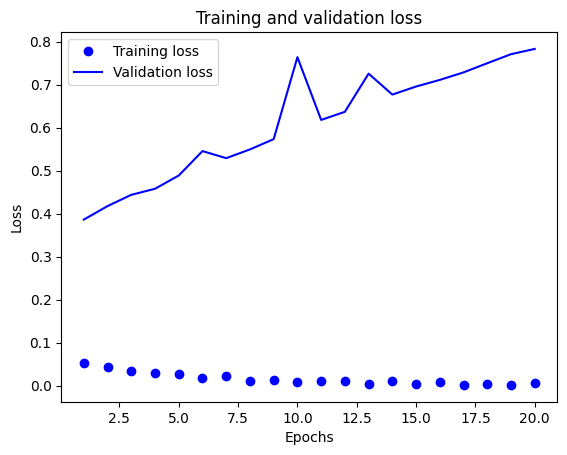

In [17]:
import matplotlib.pyplot as plt
history_dict = history.history
loss_values = history_dict["loss"]
val_loss_values = history_dict["val_loss"]
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, "bo", label="Training loss")
plt.plot(epochs, val_loss_values, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

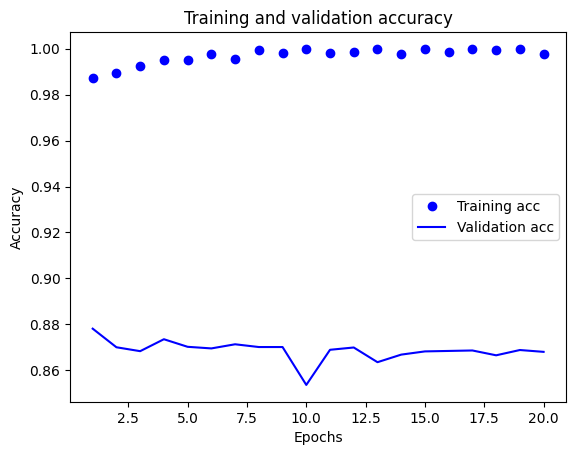

In [18]:
plt.clf()
acc = history_dict["accuracy"]
val_acc = history_dict["val_accuracy"]
plt.plot(epochs, acc, "bo", label="Training acc")
plt.plot(epochs, val_acc, "b", label="Validation acc")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [25]:
model = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])

model.compile(optimizer="rmsprop", loss="binary_crossentropy", metrics=["accuracy"])

model.fit(partial_x_train, partial_y_train, batch_size=512, epochs=4)

results = model.evaluate(x_test, y_test)

print(results)

Epoch 1/4
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - accuracy: 0.6868 - loss: 0.6198
Epoch 2/4
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - accuracy: 0.8859 - loss: 0.3685
Epoch 3/4
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - accuracy: 0.9182 - loss: 0.2635
Epoch 4/4
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - accuracy: 0.9376 - loss: 0.2046
782/782 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8761 - loss: 0.2985
[0.29706841707229614, 0.8790799975395203]
